In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.figure as fig
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

In [3]:
df = pd.read_csv('data/intervals.csv', nrows=15000)

In [4]:
# using matplotlib directly from df.hist()
# ax = df.hist(column='interval', by='uniquename', bins=50, grid=True, layout=(5,1), figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


In [5]:
# for i,x in enumerate(ax):
#    print(i, type(x))

In [6]:
# make the groupby object (this will be a Series with a Name)
gps = df.groupby('uniquename')['interval']

In [7]:
# output the basic stats of the Series, per group
gps.describe()

,count,mean,std,min,25%,50%,75%,max
uniquename,,,,,,,,
1000-0,267.0,1016.363296,694.352475,441.0,893.0,901.0,907.0,9909.0
1000-1,6575.0,1190.463878,988.947321,70.0,896.0,902.0,910.0,15285.0
1000-10,1904.0,4113.344013,4594.299328,54.0,1012.0,2694.0,5391.0,37801.0
1000-101,5293.0,1480.439070,1030.144822,2.0,1174.0,1207.0,1258.0,18386.0
1000-11,956.0,3680.764644,6150.089094,3.0,874.0,953.5,3506.5,50933.0


228.0
267 2 100 101 9909.0 441.0
5479.0
6575 6 100 101 15285.0 70.0
461.0
1904 10 100 101 37801.0 54.0
3898.0
5293 7 100 101 18386.0 2.0
486.0
956 1 100 101 50933.0 3.0


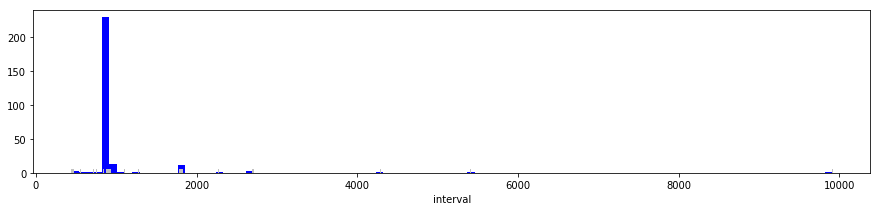

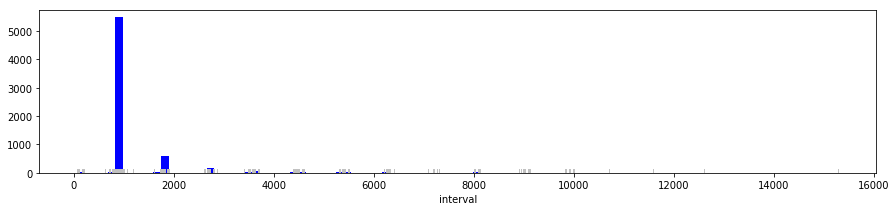

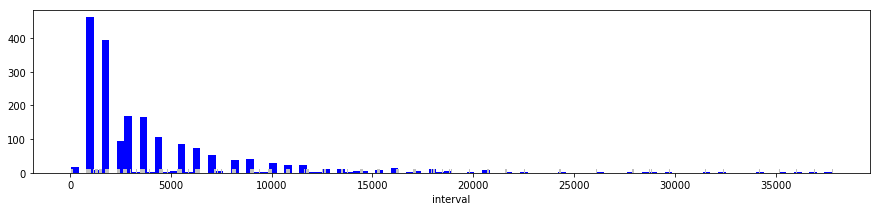

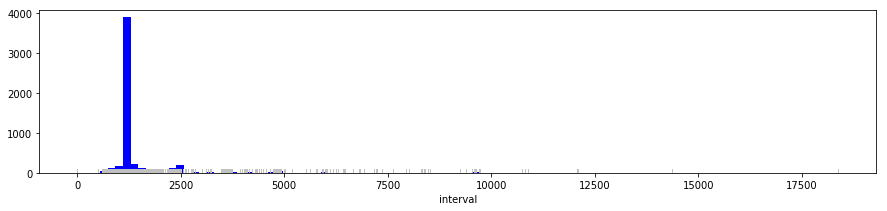

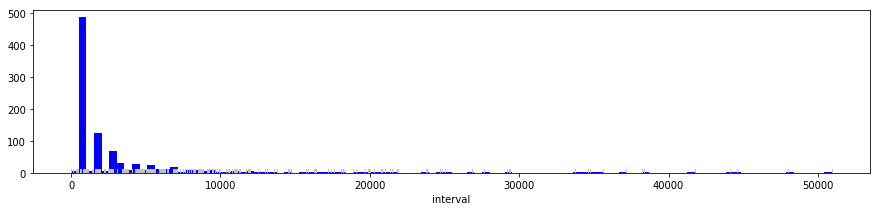

In [10]:
for name, vals in gps:
    plt.figure(figsize=(15,3))
    # sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
    p = sns.distplot(vals, bins=100, rug=True, rug_kws={"height": .025, "color": "999999"}, hist_kws={"linewidth": 2, "alpha": 1, "color": "b"}, kde=False).patches
    # print(type(p[0]))
    # print(p[0], p[1])
    vals.describe()
    heights = [item.get_height() for item in p]
    print(max(heights))
    bin_means, bin_edges, binnumber = stats.binned_statistic(vals, vals, statistic='max', bins=100)
    print(len(binnumber), binnumber[0], len(bin_means), len(bin_edges), max(bin_means), bin_edges[0])